In [1]:
import os
import re
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [6]:
df = pd.read_parquet(os.path.join("data","cnb_ceska_proza.parquet"))

In [5]:
wikid = pd.read_parquet(os.path.join("data","wikidata.parquet"))

In [9]:
wikid.columns

Index(['024_a', 'ceny', 'druh_umrti', 'facebook', 'instagram',
       'jazykove_verze', 'label_cs', 'label_en', 'manzelstvo', 'obcanstvi',
       'partnerstvo', 'popis_cs', 'popis_en', 'potomstvo', 'pricina_umrti',
       'profese', 'role', 'skoly', 'sourozenectvo', 'strany', 'twitter',
       'udalosti', 'vezeni', 'w_gender', 'w_misto_narozeni', 'w_misto_umrti',
       'w_narozeni', 'w_narozeni_presne', 'w_umrti', 'w_umrti_presne', 'web',
       'wiki_cs', 'wiki_en'],
      dtype='object')

In [10]:
wikid = wikid.reset_index(drop=False).rename(columns={"index": "100_7"})

In [11]:
df = df.merge(pd.read_parquet(os.path.join('data','cnb_vyber.parquet')), left_index=True, right_index=True, how="left")

In [12]:
df = df.explode('100_7')

In [13]:
df = df.merge(wikid, left_on='100_7', right_on='100_7', how='left')

In [14]:
df = df[(df['w_umrti'] >= df['rok']) | (df['w_umrti'].isnull())]

In [15]:
df

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
0,1804.0,Wesnického Faráře Rozmlauwánj s swými Osadniky,Rulík Jan,jk01103049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1804.0,Mrawné propowjdky s prawdiwýma přjklady vtwrzené,Hanke z Hankenštejna Jan Alois,jk01033422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1807.0,Zrcadlo wýborného sedlského obcowánj předstawu...,Němeček František,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1807.0,Ladislaw a djtky geho,Nejedlý Vojtěch,jk01082969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1808.0,"Cytara nowého zákona prawého Boha, w předrahýc...",Koniáš Antonín,jk01061522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47412,2024.0,Fušeři,Holub Metoděj,xx0316528,240411s2024 xr a g 000 1dcze,[978-80-7443-483-9],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-3), (093.3)]",[aut],xx0316528,"Holub, Metoděj,",1977-,None,Fušeři /,Metoděj Holub,None,None,None,None,None,None,None,None,None,None,None,[[Brno] :],"[Větrné mlýny,]",[2024],[1],[167 stran :],[barevné ilustrace ;],[20 cm],None,None,None,[Svérázný deník sestavený z autorových faceboo...,"[Autor vystudoval právo a sociální politiku, i...",None,No

In [16]:
df[df['100_a'].astype(str).str.contains('Poláček, Karel')]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en
5812,1926.0,Povídky israelského vyznání,Poláček Karel,jk01100136,000217s1926 xr ||| | cze,None,None,None,None,None,None,None,[821.162.3-3],[Česká próza],[821.162.3-32],[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Povídky israelského vyznání /,Karel Poláček,None,None,None,None,None,[Praha :],"[Pokrok,]",[1926],None,None,None,None,None,None,None,[76 s. ;],None,[8°],[Dobrá četba ;],[sv. 11],None,None,None,None,None,None,None,None,None,None,None,None,[české povídky],None,None,None,None,None,None,None,None,[Dobrá četba (Pokrok)],None,None,nam a22 1 4500,Q571203,[Řád Tomáše Garrigua Masaryka II. třídy],None,None,None,"[it, de, fa, eo, cs, arz, en, fr, ru, uk, sk]",Karel Poláček,Karel Poláček,[Ada Poláčková],"[Předlitavsko, Československo]",[Dora Vaňáková],"český humorista, novinář, romanopisec, scenári...","Czech humorist, publicist, bookwriter, scriptw...",None,None,"[spisovatel, scenárista, novinář, filmový scen...",[oběť holokaustu],[Právnická fakulta Univerzity Karlovy],"[Arnošt Poláček, Zdeněk Poláček]",None,None,"[oběť holokaustu, Transport De, Transport Es]","[Koncentrační tábor Osvětim, Židovské ghetto T...",muž,[Rychnov nad Kněžnou],"[Gliwice, Osvětim, Koncentrační tábor Osvětim]",1892.0,+1892-03-22T00:00:00Z,1945.0,+1945-01-21T00:00:00Z,None,https://cs.wikipedia.org/wiki/Karel_Pol%C3%A1%...,https://en.wikipedia.org/wiki/Karel_Pol%C3%A1%...
6855,1931.0,Hráči,Poláček Karel,jk01100136,991123s1931 xr a 000 1 cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-3, (0:82-321.5)]",[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Hráči :,Karel Poláček ; [ilustrace ... O. Mrkvičky],None,None,None,None,None,[Praha :],"[Fr. Borový,]",[1931],[(v Brně :],[Polygrafia)],None,None,None,None,None,[223 s. :],[il. ;],[21 cm],[Knihy Karla Poláčka ;],[2],None,[Autor si v půvabné próze vzal na mušku svého ...,None,None,None,None,None,None,None,None,None,None,"[české prózy, humoristické prózy, Czech prose,...",None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,Q571203,[Řád Tomáše Garrigua Masaryka II. třídy],None,None,None,"[it, de, fa, eo, cs, arz, en, fr, ru, uk, sk]",Karel Poláček,Karel Poláček,[Ada Poláčková],"[Předlitavsko, Československo]",[Dora Vaňáková],"český humorista, novinář, romanopisec, scenári...","Czech humorist, publicist, bookwriter, scriptw...",None,None,"[spisovatel, scenárista, novinář, filmový scen...",[oběť holokaustu],[Právnická fakulta Univerzity Karlovy],"[Arnošt Poláček, Zdeněk Poláček]",None,None,"[oběť holokaustu, Transport De, Transport Es]","[Koncentrační tábor Osvětim, Židovské ghetto T...",muž,[Rychnov nad Kněžnou],"[Gliwice, Osvětim, Koncentrační tábor Osvětim]",1892.0,+1892-03-22T00:00:00Z,1945.0,+1945-01-21T00:00:00Z,None,https://cs.wikipedia.org/wiki/Karel_Pol%C3%A1%...,https://en.wikipedia.org/wiki/Karel_Pol%C3%A1%...
6991,1932.0,Muži v offsidu,Poláček Karel,jk01100136,090903s1932 xr a g 000 f cze,None,None,[(Brož.)],None,None,None,None,[821.162.3-3],[Česká próza],"[821.162.3-31, (0:82-311.5)]",[aut],jk01100136,"Poláček, Karel,",1892-1945,None,Muži v offsidu :,Karel Poláček ; [ilustroval ... A. Pelc],None,None,None,[3. vyd.],None,[Praha :],"[Fr. Borový,]",[1932],[(V Brně :],[Polygrafia)],None,None,None,None,None,[353 s. :

In [17]:
df[df['strany'].astype(str).str.contains('Q',na=False)]

,rok,titul,autorstvo,autorstvo_kod,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,520_a,520_b,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,024_a,ceny,druh_umrti,facebook,instagram,jazykove_verze,label_cs,label_en,manzelstvo,obcanstvi,partnerstvo,popis_cs,popis_en,potomstvo,pricina_umrti,profese,role,skoly,sourozenectvo,strany,twitter,udalosti,vezeni,w_gender,w_misto_narozeni,w_misto_umrti,w_narozeni,w_narozeni_presne,w_umrti,w_umrti_presne,web,wiki_cs,wiki_en


In [18]:
strany = df[['strany']].explode('strany').groupby('strany').size().sort_values(ascending=False)

In [19]:
strany

strany
Komunistická strana Československa                                    1015
Sociální demokracie                                                    109
KDU-ČSL                                                                 52
Komunistická strana Čech a Moravy                                       50
Občanská demokratická strana                                            46
Česká strana národně sociální                                           41
Česká strana pokroková                                                  38
Strana zelených                                                         38
Občanské fórum                                                          37
Národní strana svobodomyslná                                            32
TOP 09                                                                  29
ANO 2011                                                                28
Republikánská strana zemědělského a malorolnického lidu                 23
Národní strana    

In [20]:
vezeni = df[['vezeni']].explode('vezeni').groupby('vezeni').size().sort_values(ascending=False)
vezeni

vezeni
Židovské ghetto Terezín                       158
Malá pevnost Terezín                          148
Koncentrační tábor Osvětim                    113
Koncentrační tábor Dachau                      82
Koncentrační tábor Buchenwald                  78
Koncentrační tábor Sachsenhausen               17
Koncentrační tábor Mauthausen-Gusen            12
Koncentrační tábor Gross-Rosen                  8
Koncentrační tábor Neuengamme                   5
Bergen-Belsen                                   5
Koncentrační tábor Ravensbrück                  3
vazební věznice Praha Pankrác                   2
Lodžské ghetto                                  1
koncentrační tábor Flossenbürg                  1
věznice Gestapa v terezínské Malé pevnosti      1
Ústav eutanazie v Bernburgu                     1
Špilberk                                        1
dtype: int64

<Axes: xlabel='rok'>

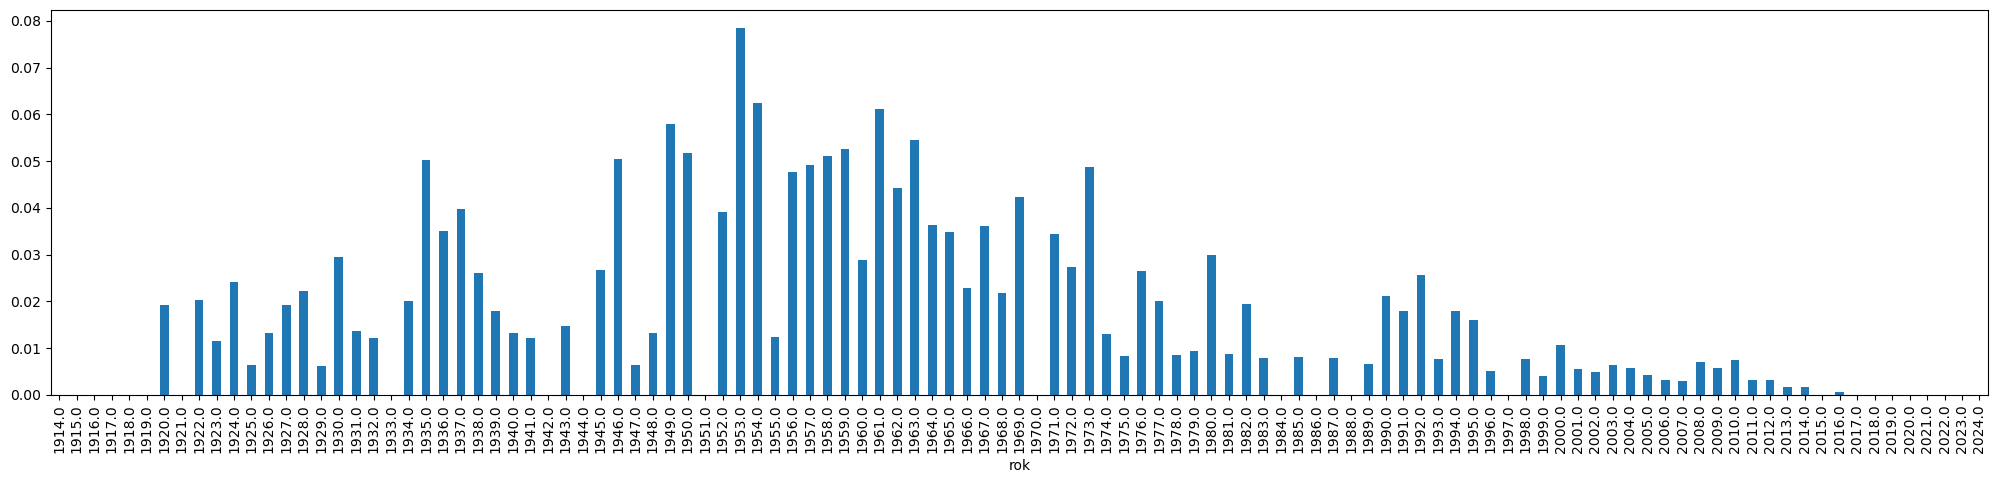

In [75]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Terezín',na=False)].groupby('rok').size() / df.groupby('rok').size()).tail(111).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

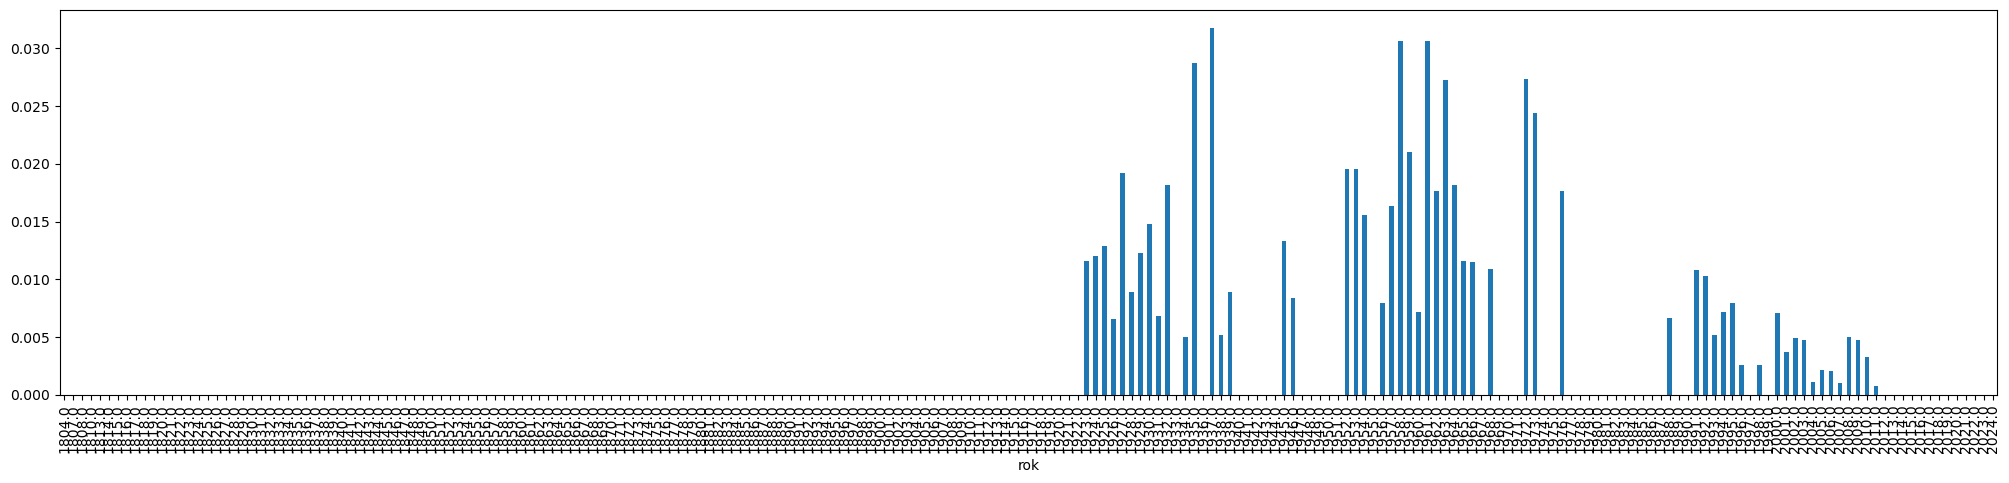

In [65]:
pd.Series(df[df['vezeni'].astype(str).str.contains('Koncentrační tábor Osvětim',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

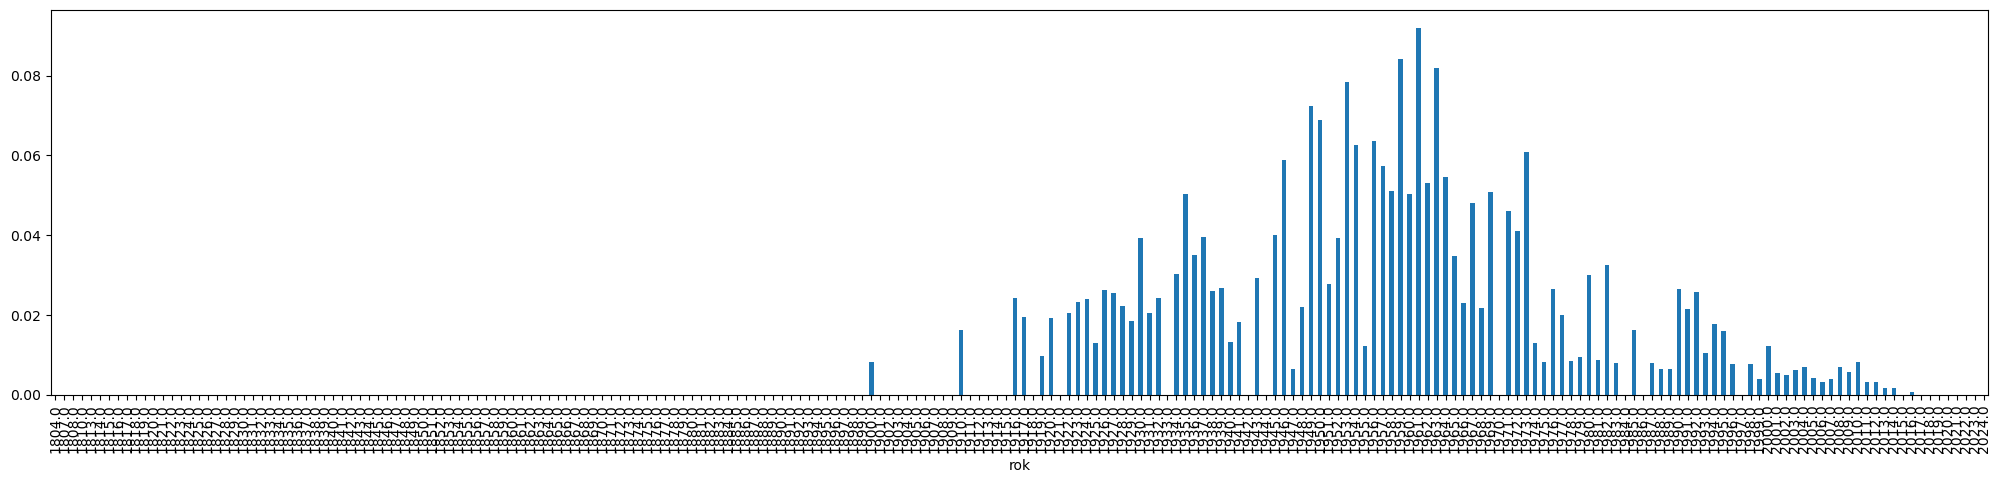

In [25]:
pd.Series(df[df['vezeni'].notnull()].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

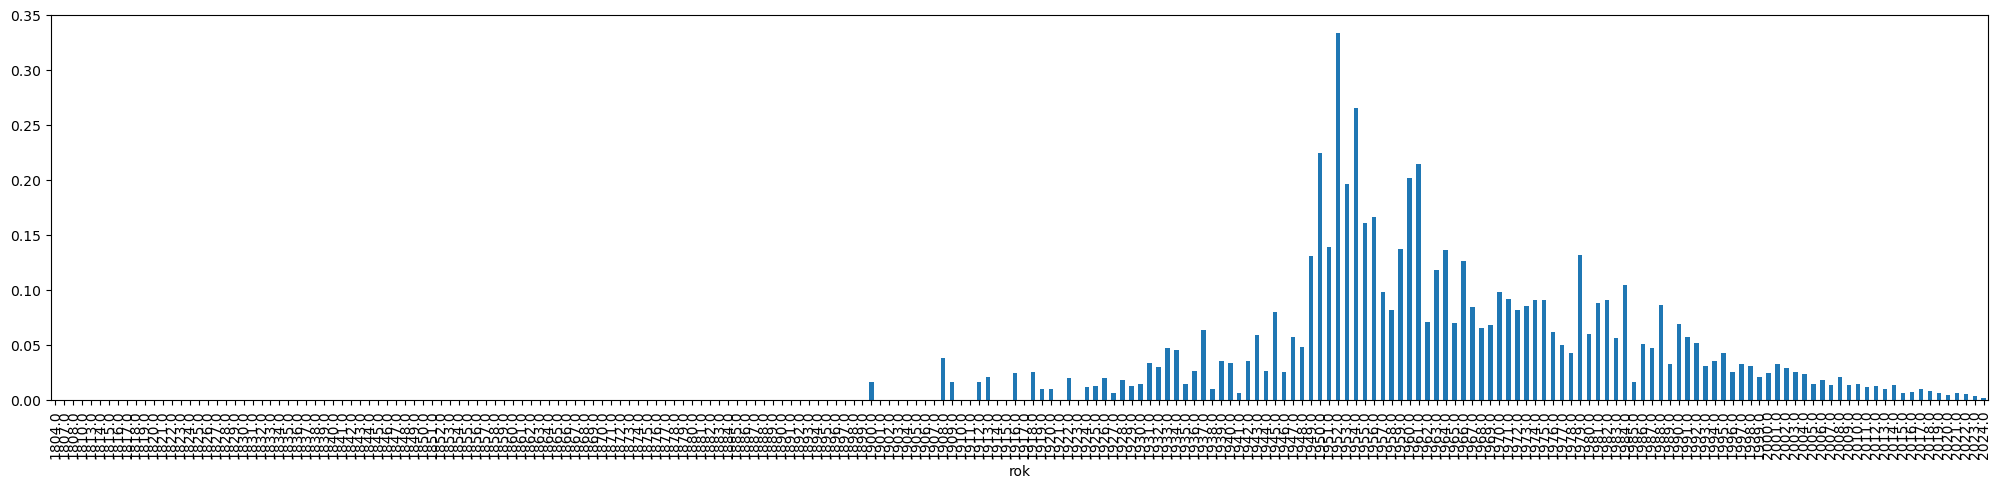

In [85]:
(df[df['strany'].astype(str).str.contains('Komunistická strana Československa',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

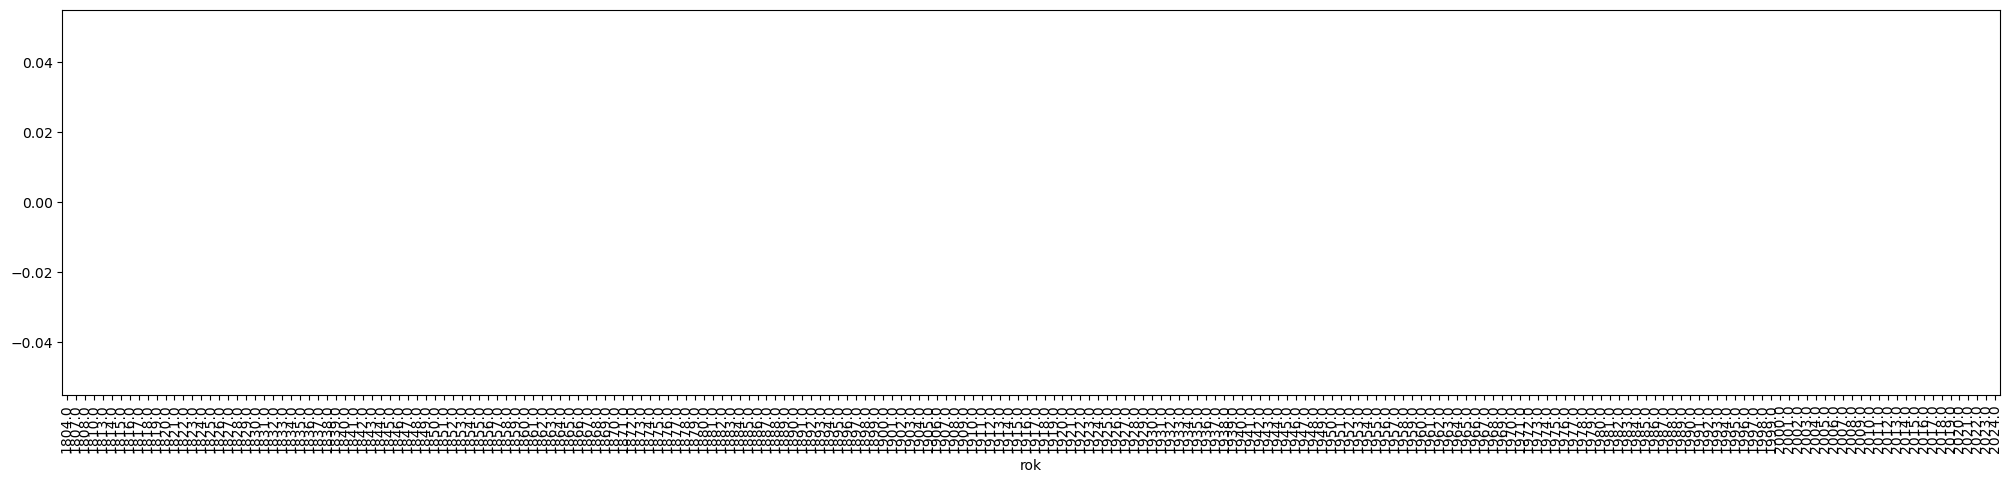

In [29]:
pd.Series(df[df['strany'].astype(str).str.contains('Q828099',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

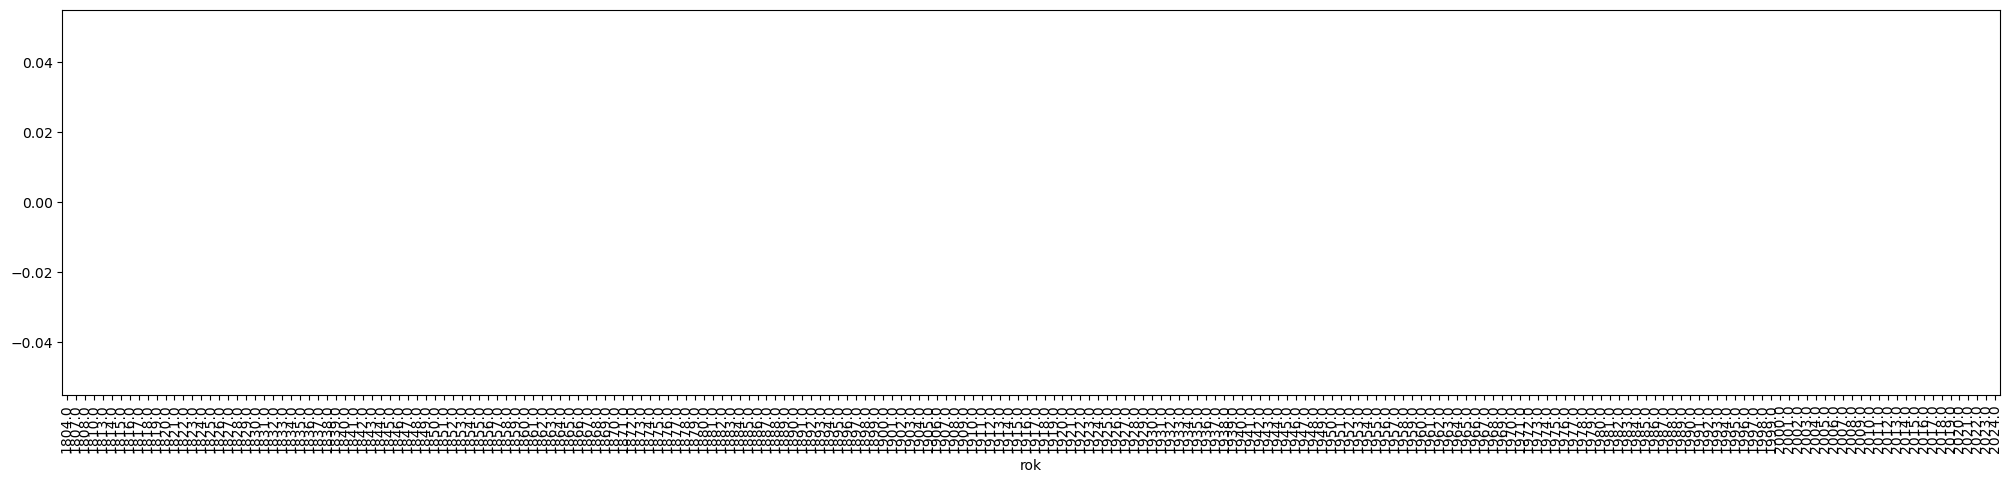

In [30]:
pd.Series(df[df['strany'].astype(str).str.contains('Q727724',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [31]:
df.explode('udalosti').groupby('udalosti').size().nlargest(10)

udalosti
svatba          124
ordinace        105
Transport Ek     74
Transport Cc     52
odvod branců     39
Transport L      36
emigrace         32
Transport Dh     18
Transport Di     14
rozvod           13
dtype: int64

<Axes: xlabel='rok'>

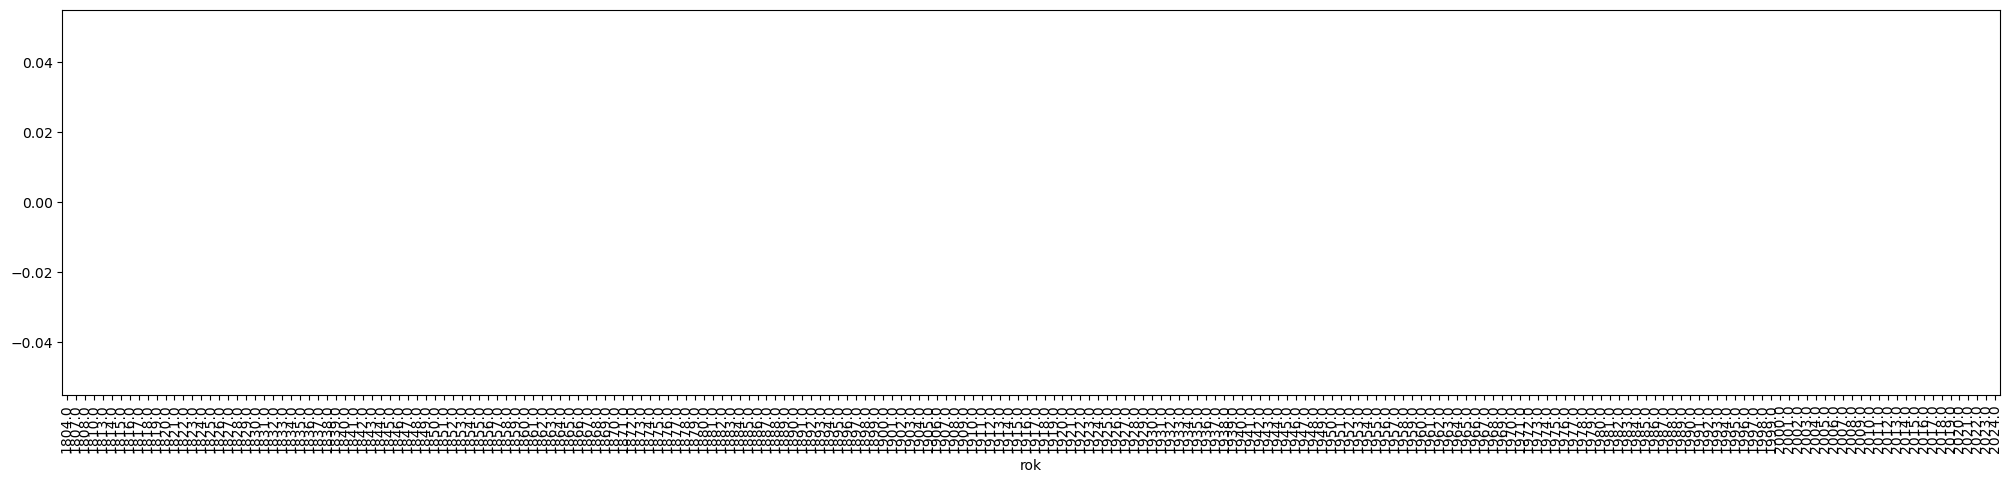

In [32]:
pd.Series(df[df['udalosti'].astype(str).str.contains('Q76358450',na=False)].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

In [87]:
df.explode('druh_umrti').groupby('druh_umrti').size().nlargest(10)

druh_umrti
přirozená smrt             401
sebevražda                  63
trest smrti                 14
smrtelná nehoda             12
nepřirozená smrt             3
zabití člověka člověkem      1
dtype: int64

<Axes: xlabel='rok'>

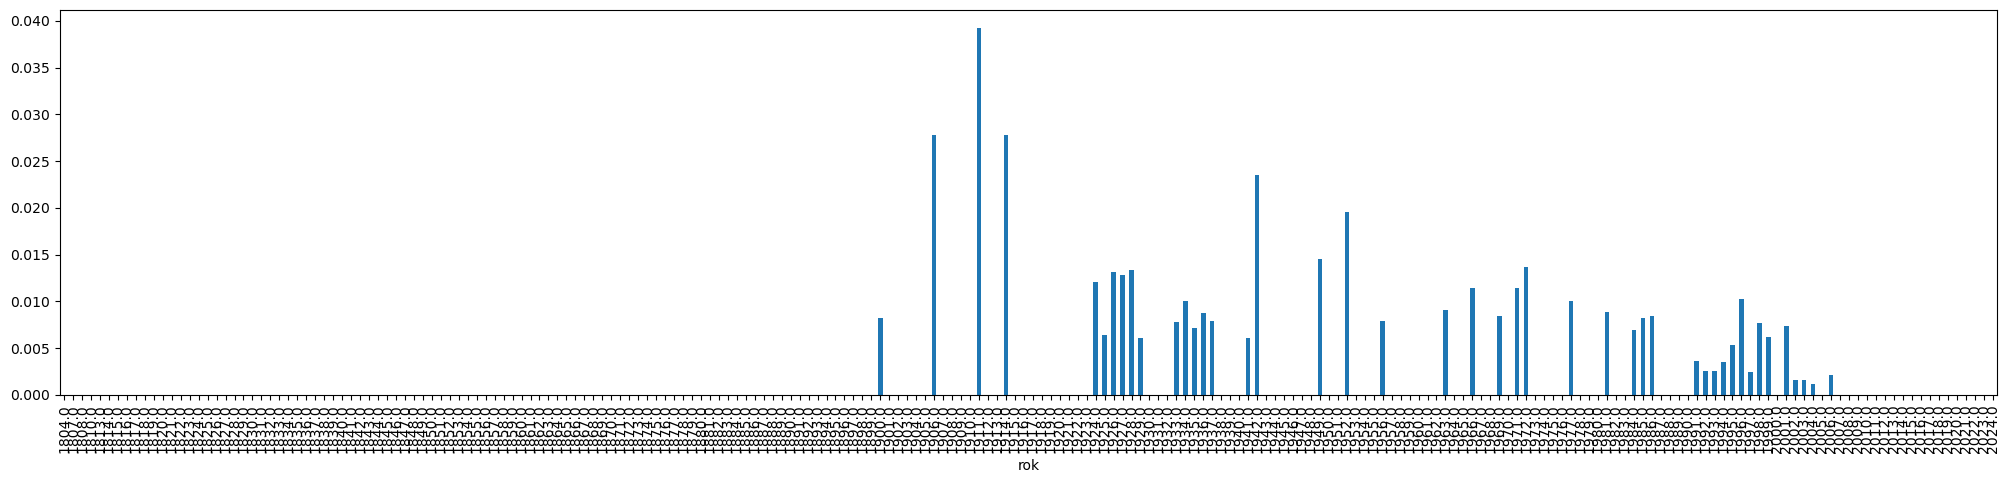

In [91]:
(df[df['druh_umrti'].astype(str).str.contains('sebevražda')].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

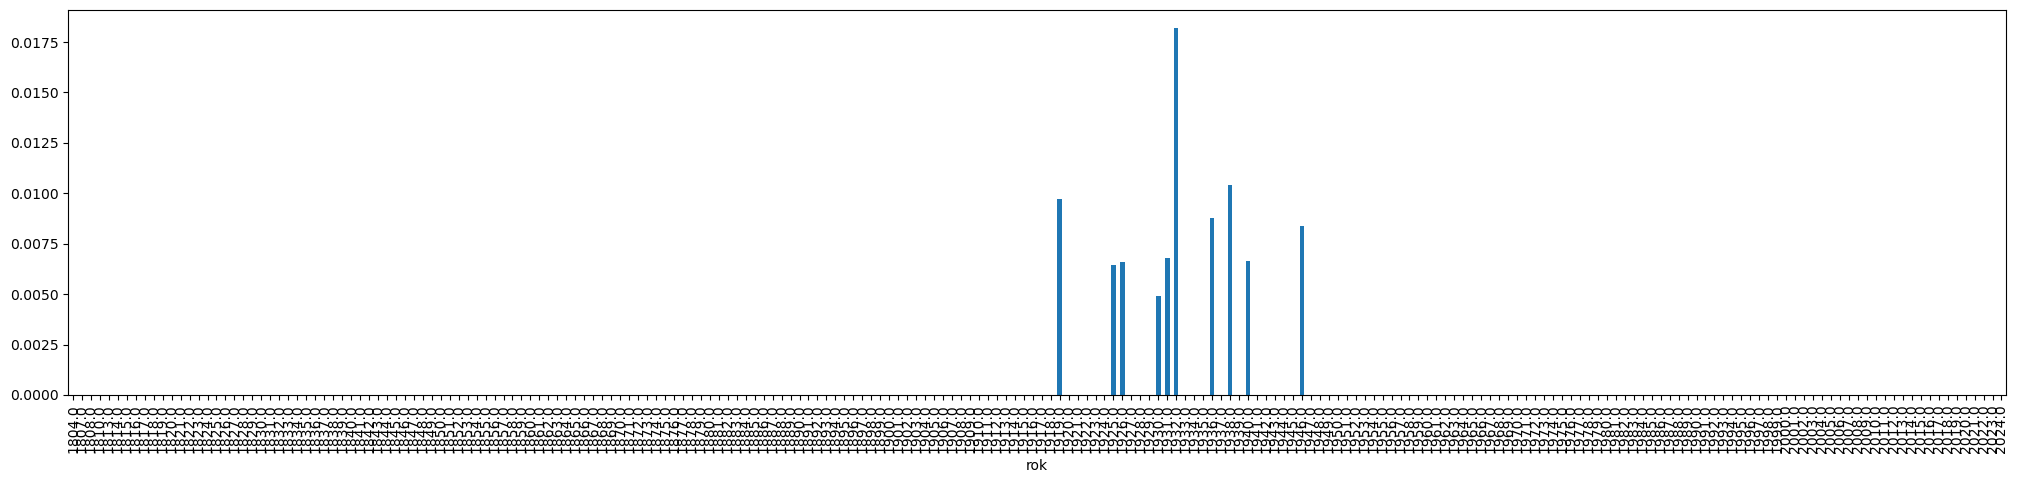

In [93]:
(df[df['druh_umrti'].astype(str).str.contains('trest smrti')].groupby('rok').size() / df.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

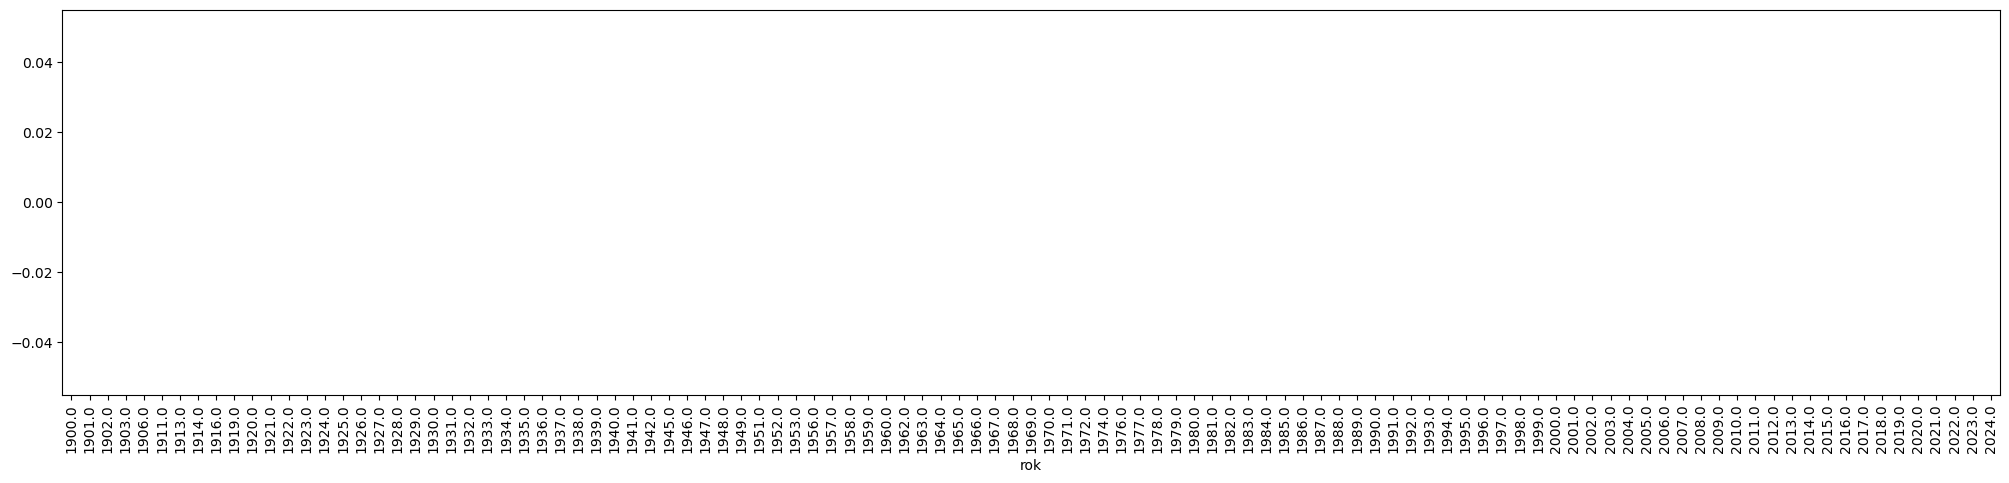

In [33]:
(df[df['druh_umrti'].astype(str).str.contains('Q10737')].groupby('rok').size() / df[df['druh_umrti'].notnull()].groupby('rok').size()).plot.bar(figsize=(25,5))